# Connect database

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import datajoint as dj
import h5py
import sys
import pandas as pd


cwd = !pwd
cwd = cwd[0]

#Add the directory containing utils_data_extraction.py to the Python path
sys.path.append(os.path.abspath(f'{cwd}/GitRepos/jaxley_rgc/'))



In [2]:
!hostname

ssuhai_GPU1-dj_gpu4


In [3]:
username = !whoami
username = username[0]

home_directory = os.path.expanduser("~")
print(username,home_directory)

data_dir = f'{home_directory}/GitRepos/jaxley_rgc/extracted_data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Set config file
config_file = f'{home_directory}/datajoint/dj_{username}_conf.json'
assert os.path.isfile(config_file), f'Set the path to your config file: {config_file}'

# Path to djimaging
path_to_djimaging = f'{home_directory}/GitRepos/s-on-alpha-regional/code/AlphaDjimaging/djimaging'





ssuhai /gpfs01/euler/User/ssuhai


In [4]:
from djimaging.user.alpha.utils import database

# set schema name
schema_name = 'ageuler_joesterle_alpha_ca'

indicator = 'calcium'
# indicator = 'glutamate'
database.connect_dj(indicator=indicator)

/gpfs01/euler/User/ssuhai/GitRepos/s-on-alpha-regional/code/AlphaDjimaging/djimaging/autorois/roi_canvas.py:24: UserWarning: Failed to import ipycanvas. AutoROIs will not work.
  warnings.warn('Failed to import ipycanvas. AutoROIs will not work.')
/gpfs01/euler/User/ssuhai/GitRepos/s-on-alpha-regional/code/AlphaDjimaging/djimaging/tables/rf_glm/rf_glm_utils.py:19: UserWarning: Failed to import RFEst: Cannot compute receptive fields.
  warnings.warn('Failed to import RFEst: Cannot compute receptive fields.')
[2025-01-20 14:12:51,984][INFO]: Connecting ssuhai@172.25.240.200:3306
[2025-01-20 14:12:52,032][INFO]: Connected ssuhai@172.25.240.200:3306


schema_name: ageuler_joesterle_alpha_ca
dataset: calcium


In [12]:
# database.RelativeRoiPos() # only dy,dx 
database.FieldPosMetrics.RoiPosMetrics()

experimenter name of the experimenter,date date of recording,exp_num experiment number in a day,field string identifying files corresponding to field,roi_pos_params_hash unique param set hash,roi_id integer id of each ROI,path_id,loc_on_path,roi_pos_xyz,roi_pos_xyz_rel_to_soma,d_dist_to_soma,norm_d_dist_to_soma,ec_dist_to_soma,ec_dist_to_density_center,branches_to_soma,num_branches_to_soma
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,1,107,=BLOB=,=BLOB=,=BLOB=,140.978,0.638205,116.195,117.976,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,2,107,=BLOB=,=BLOB=,=BLOB=,112.357,0.508636,92.334,94.0743,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,3,107,=BLOB=,=BLOB=,=BLOB=,117.173,0.530439,96.7061,98.465,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,4,107,=BLOB=,=BLOB=,=BLOB=,137.378,0.621906,113.364,115.057,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,5,107,=BLOB=,=BLOB=,=BLOB=,124.131,0.561936,102.416,104.329,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,6,107,=BLOB=,=BLOB=,=BLOB=,120.92,0.547401,99.4896,101.396,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,7,107,=BLOB=,=BLOB=,=BLOB=,128.833,0.583223,106.646,108.51,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,8,107,=BLOB=,=BLOB=,=BLOB=,106.324,0.481328,86.9419,88.6985,=BLOB=,5
Ran,2018-06-10,1,D1,943ab374aa2c45298aafba0732936bcd,9,107,=BLOB=,=BLOB=,=BLOB=,111.416,0.504378,91.5017,93.2517,=BLOB=,5
Ran,2018-06-10,1,D2,943ab374aa2c45298aafba0732936bcd,1,33,=BLOB=,=BLOB=,=BLOB=,27.7427,0.125591,19.492,12.5617,=BLOB=,4


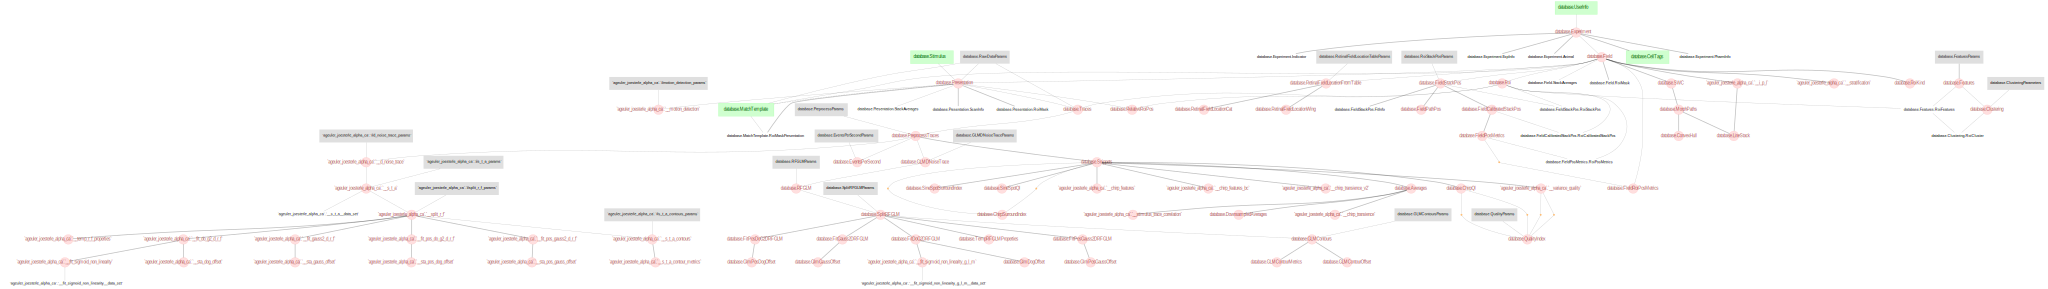

In [99]:
dj.ERD(database)

In [54]:
date = "2020-07-08"
stimulus = "noise_1500"
database.PreprocessTraces() & f'date="{date}"' & f'stim_name="{stimulus}"' & 'field NOT LIKE "%ROI"'

experimenter name of the experimenter,date date of recording,exp_num experiment number in a day,field string identifying files corresponding to field,stim_name Unique string identifier,raw_id unique param set id,cond1 cond1 (pharmacological or other),roi_id integer id of each ROI,preprocess_id unique param set id,"preprocess_trace_times Time of preprocessed trace, if not resampled same as in trace.",preprocess_trace preprocessed trace,smoothed_trace output of savgol filter which is subtracted from the raw trace
Ran,2020-07-08,1,d1,noise_1500,1,control,1,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,2,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,3,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,4,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,5,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,6,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,7,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d1,noise_1500,1,control,8,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d2,noise_1500,1,control,1,1,=BLOB=,=BLOB=,=BLOB=
Ran,2020-07-08,1,d2,noise_1500,1,control,2,1,=BLOB=,=BLOB=,=BLOB=


In [130]:
# (database.FieldStackPos() & f'date="{date}"').fetch()[4] [ 'rec_cpos_stack_xyz']
(database.FieldStackPos() & f'date="{date}"').fetch()[2] [ 'rec_cpos_stack_xy_raw']

array([199., 412.], dtype=float32)

In [101]:
(database.FieldStackPos.RoiStackPos() & f'date="{date}"').fetch()[0]['roi_pos_stack_xyz']
#database.FieldStackPos()  & f'date="{date}"' &  f'field="{field_stim_extract}"' # calibrated position of rec field
# database.FieldCalibratedStackPos() # NO
# database.FieldRoiPosMetrics() # no soma info only distance to soma 
#database.FieldPosMetrics()
# database.RetinalFieldLocationFromTable() # dorsal ventral info 
# database.FieldCalibratedStackPos.RoiCalibratedStackPos()  & f'date="{date}"' &  f'field="{field_stim_extract}"' # calibrated roi pos

array([261.3911 , 249.96454,  46.     ], dtype=float32)

# get the noise stimulus trace and morphology

In [5]:
date = "2020-07-08"
stimulus = "noise_1500"
field_stim_extract = "d1" # assume stimuli are all the same with each ROI

In [103]:
import shutil

swc_path = (database.SWC() & f'date="{date}"').fetch1()['swc_path']
morph_dir = data_dir + f'/morphology/{date}'
if not os.path.isdir(morph_dir):
    os.makedirs(morph_dir)
    shutil.copy(swc_path, morph_dir)

In [104]:
stim_path = (database.Presentation() & f'date="{date}"' & f'stim_name="{stimulus}"' & f'field="{field_stim_extract}"').fetch1()['h5_header']
stim_dir = data_dir + f'/stimulus/'
if not os.path.isdir(stim_dir):
    os.makedirs(stim_dir)
    shutil.copy(stim_path, stim_dir)

# extract all rois

In [131]:
# presentation is the same for every field
stimulus_query = (database.Presentation() & f'date="{date}"' & f'stim_name="{stimulus}"' & 'field NOT LIKE "%ROI"')
recording_field_query = (database.FieldStackPos & f'date="{date}"')
presentation_query = stimulus_query * recording_field_query
field_presentation_all =presentation_query.fetch()

presentation_query
field_presentation_all[0]['rec_cpos_stack_xyz']


array([247., 254.,  46.], dtype=float32)

In [106]:
# ROI_pos_query = (database.FieldPosMetrics.RoiPosMetrics() & f'date="{date}')
ROI_pos_query = (database.FieldStackPos.RoiStackPos() & f'date="{date}"')
ROI_pos_query

experimenter name of the experimenter,date date of recording,exp_num experiment number in a day,field string identifying files corresponding to field,roi_pos_params_hash unique param set hash,roi_id integer id of each ROI,roi_pos_stack_xyz
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,1,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,2,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,3,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,4,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,5,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,6,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,7,=BLOB=
Ran,2020-07-08,1,d1,943ab374aa2c45298aafba0732936bcd,8,=BLOB=
Ran,2020-07-08,1,d2,943ab374aa2c45298aafba0732936bcd,1,=BLOB=
Ran,2020-07-08,1,d2,943ab374aa2c45298aafba0732936bcd,2,=BLOB=


In [107]:

ca_trace_querey = (database.Traces() & f'date="{date}"' & f'stim_name="{stimulus}"' & 'field NOT LIKE "%ROI"')

all_roi_data = (ROI_pos_query * ca_trace_querey).fetch()

# bring data in format and save

In [134]:


cell_df = pd.DataFrame()
for idx,roi_data in enumerate(all_roi_data):
    field_idx = int(roi_data['field'][-1]) - 1
     
    # field preesntation specific things do not change in each roi 
    noise_trigger_ts = field_presentation_all[field_idx]['triggertimes']
    pixel_size = field_presentation_all[field_idx]['pixel_size_um'] # WHAT DOES THIS MEAN???? WHY NOT 30 UM??   
    
    # OR SHOULD IT BE rec_cpos_xyz ???
    rec_pos = field_presentation_all[field_idx]['rec_cpos_stack_xy_raw']

    roi_dict = {"Triggertimes_noise": noise_trigger_ts,
                "Traces0_raw_noise": roi_data['trace'], 
                "Tracetimes0_noise": roi_data['trace_times'],
                "roi_id": roi_data['roi_id'],
                # "roi_pos": roi_data['roi_pos_xyz_rel_to_soma'],
                "roi_pos": roi_data['roi_pos_stack_xyz'],
                "image_center": rec_pos, 
                "pixel_size": pixel_size,
                "rec_id": roi_data['field'],
                "cell_id": roi_data['exp_num'],
                "recording_id": roi_data['date']
               }

    # Convert the dictionary to a DataFrame
    new_row_df = pd.DataFrame([roi_dict])

    # Use concat to add the new row to cell_df
    cell_df = pd.concat([cell_df, new_row_df], ignore_index=True)



0 [245. 250.]
0 [245. 250.]
0 [245. 250.]
0 [245. 250.]
0 [245. 250.]
0 [245. 250.]
0 [245. 250.]
0 [245. 250.]
1 [370. 138.]
1 [370. 138.]
1 [370. 138.]
1 [370. 138.]
1 [370. 138.]
1 [370. 138.]
1 [370. 138.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
2 [199. 412.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
3 [128. 296.]
4 [304. 242.]
4 [304. 242.]
4 [304. 242.]
4 [304. 242.]
4 [304. 242.]
4 [304. 242.]
4 [304. 242.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
5 [404. 320.]
6 [252. 290.]
6 [252. 290.]
6 [252. 290.]
6 [252. 290.]
6 [252. 290.]
6 [252. 290.]
6 [252. 290.]
6 [252. 290.]


# save data 

In [135]:
import pickle
with open(f'{data_dir}/cell_{date}.pkl', 'wb') as file:
    pickle.dump(cell_df, file)